<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/credit_card_churn_Decision_Tree_Imbalanced_data_SaidMP_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Creditcard service Churn**
---

The goal of this notebook is to predict whether a credit card customer will stop the bank's services or `churn`. In this notebook, we will use a Decision Tree learning algorithm by varying the size of the learning dataset.

The dataset is originated from a book: "Artificial Intelegence with deep learning" by Dr. Eng. Said Mirza Pahlevi. The dataset can be obtained from this [source](https://github.com/harishmuh/machine_learning_practices/blob/main/datasets/AI%20dengan%20DL/data/BankChurners.csv).

The explanation of variables from the dataset can be seen here

| Variable Name              | Category              | Description |
|----------------------------|-----------------------|-------------|
| CLIENTNUM                  | Identifier            | Unique identifier for the customer holding the account |
| Customer_Age               | Demographic           | Customer’s age in years |
| Gender                     | Demographic           | Gender of customer (M = Male, F = Female) |
| Dependent_count            | Demographic           | Number of dependents |
| Education_Level            | Demographic           | Educational qualification of the account holder (e.g., high school, college graduate, etc.) |
| Marital_Status             | Demographic           | Marital status (Married, Single, Divorced, Unknown) |
| Income_Category            | Demographic           | Annual income category (< $40K, $40K–$60K, $60K–$80K, $80K–$120K, > $120K, Unknown) |
| Card_Category              | Product               | Type of card (Blue, Silver, Gold, Platinum) |
| Months_on_book             | Relationship          | Period of relationship with the bank (in months) |
| Total_Relationship_Count   | Relationship          | Total number of products held by the customer |
| Months_Inactive_12_mon     | Behavioral            | Number of months inactive in the last 12 months |
| Contacts_Count_12_mon      | Behavioral            | Number of contacts in the last 12 months |
| Credit_Limit               | Financial             | Credit limit on the credit card |
| Total_Revolving_Bal        | Financial             | Total revolving balance on the credit card |
| Avg_Open_To_Buy            | Financial             | Open-to-buy credit line (average of last 12 months) |
| Total_Amt_Chng_Q4_Q1       | Transactional         | Change in transaction amount (Q4 over Q1) |
| Total_Trans_Amt            | Transactional         | Total transaction amount (last 12 months) |
| Total_Trans_Ct             | Transactional         | Total transaction count (last 12 months) |
| Total_Ct_Chng_Q4_Q1        | Transactional         | Change in transaction count (Q4 over Q1) |
| Avg_Utilization_Ratio      | Financial             | Average card utilization ratio |


## **Initial setup**

**Importing libraries**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Setting ggplot style
plt.style.use('ggplot')

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
# Loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/AI%20dengan%20DL/data/BankChurners.csv')

In [ ]:
# Reviewing dataset
display(data.head(), data.tail())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


## **EDA**

We will conduct simple Explanatory Data Analysis (EDA) to review the dataset. We will also conduct data cleaning.

In [ ]:
# Data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Renaming the column name, just to make it easy to remember
data.rename(columns={'Attrition_Flag':'status'}, inplace=True)

In [ ]:
# We will delete some of the columns as we do not need to use it for prediction
# We will drop columns: 0, 16, 19, 21 dan 22
deleted_columns = [0, 16, 19, 21, 22]
data.drop(data.columns[deleted_columns], axis=1, inplace=True)

In [ ]:
# Check the data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,status,object,0.0,False,2,"[Existing Customer, Attrited Customer]"
1,Customer_Age,int64,0.0,False,45,"[45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 3..."
2,Gender,object,0.0,False,2,"[M, F]"
3,Dependent_count,int64,0.0,False,6,"[3, 5, 4, 2, 0, 1]"
4,Education_Level,object,0.0,False,7,"[High School, Graduate, Uneducated, Unknown, C..."
5,Marital_Status,object,0.0,False,4,"[Married, Single, Unknown, Divorced]"
6,Income_Category,object,0.0,False,6,"[$60K - $80K, Less than $40K, $80K - $120K, $4..."
7,Card_Category,object,0.0,False,4,"[Blue, Gold, Silver, Platinum]"
8,Months_on_book,int64,0.0,False,44,"[39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 3..."
9,Total_Relationship_Count,int64,0.0,False,6,"[5, 6, 4, 3, 2, 1]"


**Descriptive statistics**

In [ ]:
# descriptive statistics
display(data.describe(), data.describe(include='object'))

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


,status,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## **Data Cleaning**

**Duplicates**

In [ ]:
print(f"Total duplicated data: {data[data.duplicated()].shape}")
print(f'Percentage of duplicated data {len(data[data.duplicated()])/len(data)*100:.2f}%')

Total duplicated data: (0, 18)
Percentage of duplicated data 0.00%


**Missing Values**

In [ ]:
# Missing values
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

,Missing values
status,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


There are no duplicated data and no missing values.

**Imbalance data check**

In [ ]:
# Imbalance data check
data['status'].value_counts(normalize=True)

,proportion
status,
Existing Customer,0.83934
Attrited Customer,0.16066


<Axes: ylabel='count'>

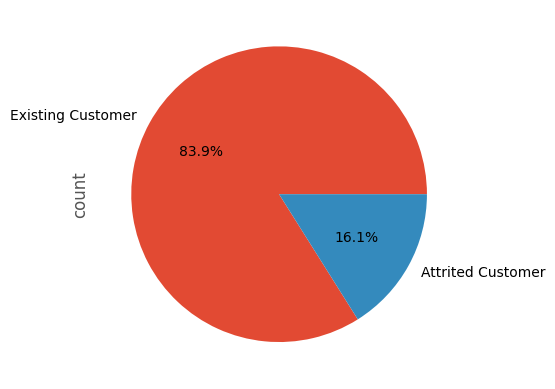

In [ ]:
# Visualizing imbalance data # pie chart
data['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Existing customer is a loyal customer at the present. The percentage of this loyal customer is more than five times the attrited customer (leaving customer). This phenomenon displays the imbalance data distribution cases.

In the next step we will build two machine learning models for two cases:

1. Imbalanced class
2. (Relatively) balanced class

We will prepare dataset for two experiments.

## **Data Preparation for study cases**

We will set proportion for the study for the the imbalance class

In [ ]:
# Setting proportion
loyal_sample = 8500
churn_sample = 400
random_seed = 2

In [ ]:
# Dividing loyal and churn customers
df_loyal = data[data['status'] == 'Existing Customer']
df_churn = data[data['status'] == 'Attrited Customer']

len(df_loyal), len(df_churn)

(8500, 1627)

We take 400 leaving customers randomly

In [ ]:
# Sampling the 400 rows of leaving customers
df_churn_sampled = df_churn.sample(churn_sample, random_state=random_seed)

In [ ]:
# sampling the loyal customers
df_loyal_sampled = df_loyal.sample(loyal_sample, random_state=random_seed)

In [ ]:
# Combining the leaving customers with loyal customers
dataset_sampled = pd.concat([df_loyal_sampled, df_churn_sampled])
len(dataset_sampled)

8900

# **Study case 1**

**Initial setup**

In [ ]:
# Importing libraries for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score

**Defining features and target**

In [ ]:
# Setting features and target
X = dataset_sampled.drop('status', axis=True)
y = dataset_sampled['status']

**Data preprocessing**

We will use onehot encoding for data preprocessing step.

In [ ]:
# One hot encoding
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

In [ ]:
# Sanity check
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8900 entries, 1322 to 7336
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8900 non-null   int64  
 1   Dependent_count                 8900 non-null   int64  
 2   Months_on_book                  8900 non-null   int64  
 3   Total_Relationship_Count        8900 non-null   int64  
 4   Months_Inactive_12_mon          8900 non-null   int64  
 5   Contacts_Count_12_mon           8900 non-null   int64  
 6   Credit_Limit                    8900 non-null   float64
 7   Total_Revolving_Bal             8900 non-null   int64  
 8   Avg_Open_To_Buy                 8900 non-null   float64
 9   Total_Trans_Amt                 8900 non-null   int64  
 10  Total_Trans_Ct                  8900 non-null   int64  
 11  Avg_Utilization_Ratio           8900 non-null   float64
 12  Gender_M                        8900

**Data splitting**

We will conduct data splitting to set the experiment with proportion as 70% for training data and 30% for testing data

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [ ]:
# Sanity check
len(X_train), len(X_test)

(6230, 2670)

**Defining model and training**

We will use decision tree for the experiment

In [ ]:
# Defining model
model = DecisionTreeClassifier(max_depth=2, random_state=random_seed)

**Training**

In [ ]:
# Model training
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

**Evaluation**

We will evaluate the model with test set

In [ ]:
# Prediction
y_pred = model.predict(X_test)

We will check with the recall score

In [ ]:
# recall score
recall_score(y_test, y_pred, average=None)

array([0.28571429, 0.99288538])

Based on the result above, we get two scores of recall:
* 28.6% of leaving customers
* 99.3% of loyal customers

The higher score of loyal customers are higher because of the loyal customer examples are more dominant than the leaving customers. This cause the model learn better on the loyal customers (Class imbalanced problem)

**Visualization**

We will see the decision tree look like

In [ ]:
from sklearn.tree import plot_tree
from sklearn import tree

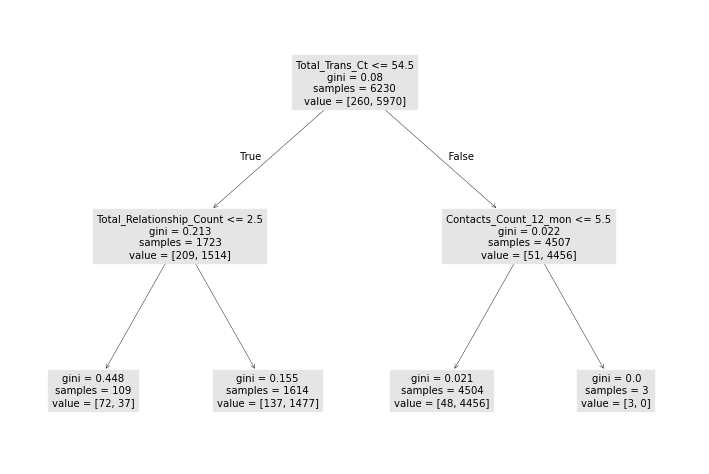

In [ ]:
plt.figure(figsize=(15,10), dpi=60)
plot_tree(model, feature_names=X.columns)
plt.show()

We can also check how model works based on features.

In [ ]:
# Print model
rules = tree.export_text(model)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_3 <= 2.50
|   |   |--- class: Attrited Customer
|   |--- feature_3 >  2.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_5 <= 5.50
|   |   |--- class: Existing Customer
|   |--- feature_5 >  5.50
|   |   |--- class: Attrited Customer



We can see some features there:

* feature_10: Total_Trans_Ct
* feature_3: Total_Relationship_Count
* feature_5: Contacts_Count_12_mon


So, this tree suggests:

1. Low transaction activity (≤ 54 transactions/year)

  * Few products (≤ 2) → High churn risk

  * More products (> 2) → Likely retained

2. High transaction activity (> 54 transactions/year)

  * Few contacts with bank (≤ 5) → Likely retained

  * Many contacts (> 5) → High churn risk






# **Study Case 2**

In this case, we will use 1627 churn customers and 8500 loyal customers to train machine learning models.

**Dataset preparation**

In [ ]:
# Copying dataset
dataset_full = data.copy(deep=True)

**Defining target and features**

In [ ]:
# Defining target and other features
X = dataset_full.drop('status', axis=True)
y = dataset_full['status']

**Data Prepocessing**


In [ ]:
# Data prepocessing with one hot encoding
X = pd.get_dummies(X, drop_first=True) # Hot Encoding the category/string columns

**Data Splitting**

In [ ]:
# Data splitting (70% training set and 30% testing set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

**Defining model**

In [ ]:
# Defining model
model2 = DecisionTreeClassifier(max_depth=2, random_state=random_seed)

**Training**

In [ ]:
# Model training
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

**Model evaluation**

In [ ]:
y_pred = model2.predict(X_test)

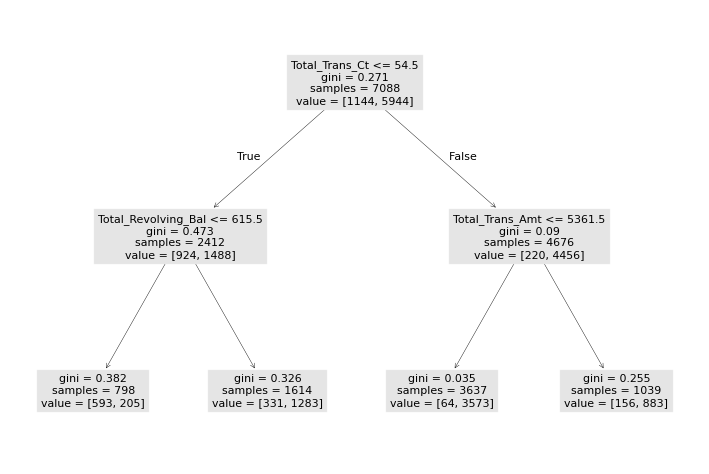

In [ ]:
plt.figure(figsize=(15,10), dpi=60)
plot_tree(model2, feature_names=X.columns)
plt.show()

In [ ]:
rules = tree.export_text(model2)
print(rules)

|--- feature_10 <= 54.50
|   |--- feature_7 <= 615.50
|   |   |--- class: Attrited Customer
|   |--- feature_7 >  615.50
|   |   |--- class: Existing Customer
|--- feature_10 >  54.50
|   |--- feature_9 <= 5361.50
|   |   |--- class: Existing Customer
|   |--- feature_9 >  5361.50
|   |   |--- class: Existing Customer



Based on the decision tree, We can see some features there:

feature_10: Total_Trans_Ct
feature_7: Total_Revolving_Bal
feature_9: Total_Trans_Amt

So, this tree suggests:

1. Low transaction activity (≤ 54 transactions/year)
  * Low revolving balance (≤ 615) → High churn risk
  * Higher revolving balance (> 615) → Likely retained

2. High transaction activity (> 54 transactions/year)
  * Lower transaction amount (≤ 5361) → Likely retained
  * Higher transaction amount (> 5361) → Likely retained

The model indicates that transaction frequency is the primary driver of churn.

* Customers with low transaction count and low financial engagement are most likely to attrite.

* Customers with high transaction activity are predicted as existing customers regardless of transaction amount.

In [ ]:
recall_score(y_test, y_pred, average=None)

array([0.4989648, 0.9643975])

Based on the result above, we get two scores of recall:

* 49.9% of leaving customers
* 96.4% of loyal customers

The recall score of leaving customers for this model was higher than the previous study case 1.